In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# L and n of trans

,CH1,CH2,CH4,time,Ts
0,-52.0,-0.015,-0.08,0.000000e+00,1.000000e-08
1,-48.0,-0.022,0.00,1.000000e-08,NaN
2,-50.0,-0.016,0.04,2.000000e-08,NaN
3,-48.0,-0.016,-0.06,3.000000e-08,NaN
4,-48.0,-0.018,0.00,4.000000e-08,NaN
...,...,...,...,...,...
9995,-48.0,-0.024,-0.12,9.995000e-05,NaN
9996,-48.0,-0.028,-0.12,9.996000e-05,NaN
9997,-46.0,-0.024,-0.16,9.997000e-05,NaN
9998,-44.0,-0.031,-0.18,9.998000e-05,NaN


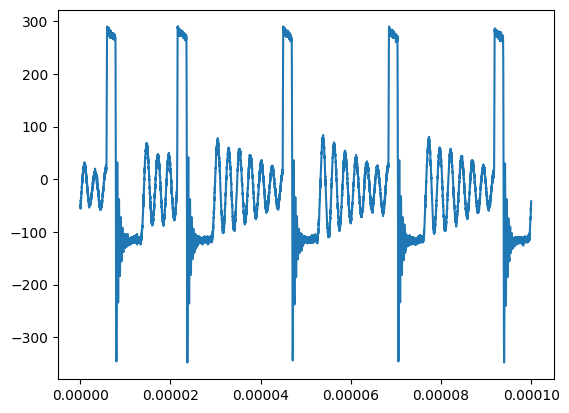

In [15]:
df= pd.read_csv("2025-12-21_13-58-57-607.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values
Vs = df.CH4.values*10 # see 2025-12-21_13-58-57-607.txt CH4
time = np.arange(0, len(Vp)*Ts, Ts)
plt.plot(time, Vp)
df

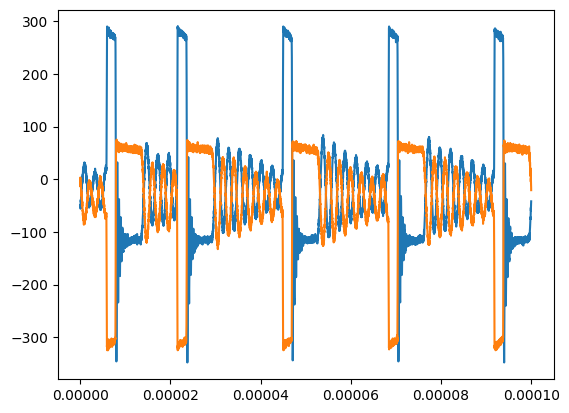

In [17]:
plt.plot(time, Vp)
plt.plot(time, 8*Vs)

In [10]:
df= pd.read_csv("2025-12-21_13-59-23-559.csv")
Vp0 = df.CH1.values.mean()
Ip0= df.CH2.values.mean()
Vs0 = df.CH4.values.mean()*10
Vp0, Ip0, Vs0

(np.float64(-21.3888), np.float64(-0.0040273), np.float64(-4.9542600000000006))

In [11]:
Vp = Vp-Vp0
Vs = Vs-Vs0
Ip = Ip-Ip0

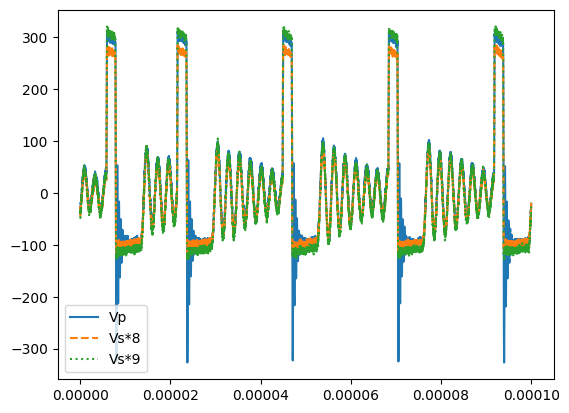

In [15]:

plt.plot(time, Vp, label = "Vp")
n= 8
plt.plot(time, -n*Vs, label = f"Vs*{n}",  linestyle = "--")

n= 9
plt.plot(time, -n*Vs, label = f"Vs*{n}",  linestyle = "dotted")
plt.legend()

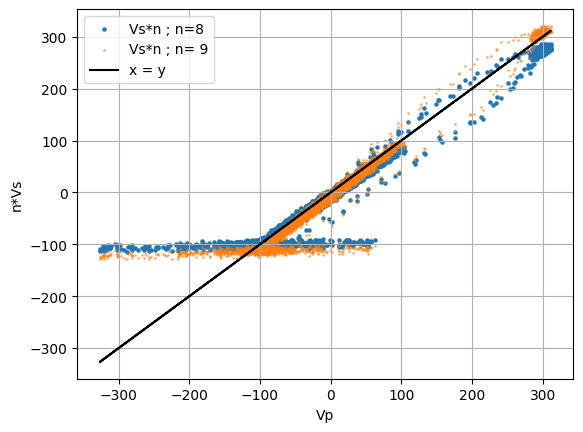

In [17]:
n= 8
plt.scatter(Vp, -n*Vs, label = f"Vs*n ; n={n}", s= 5)

n= 9
plt.scatter(Vp, -n*Vs, label = f"Vs*n ; n= {n}", s= 1, alpha = 0.5)
plt.plot(Vp, Vp, label = "x = y", c='k')
plt.legend()
plt.xlabel ("Vp")
plt.ylabel ("n*Vs")
plt.grid()

In [18]:
# n= 8

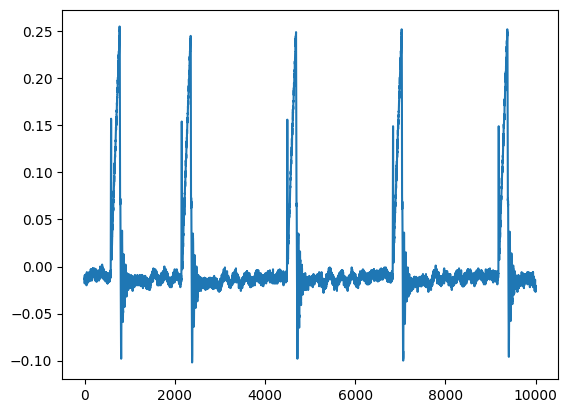

In [19]:
plt.plot(Ip)

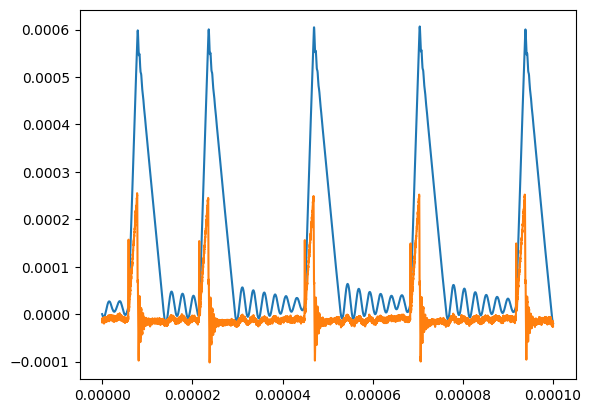

In [26]:
#scipy.integrate.cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)[source]
import  scipy
integVp = scipy.integrate.cumulative_trapezoid(y= Vp, dx=Ts,initial=0)
a= -4.5
integVp =integVp +a*time
plt.plot(time, integVp )
plt.plot(time, Ip*1e-3)

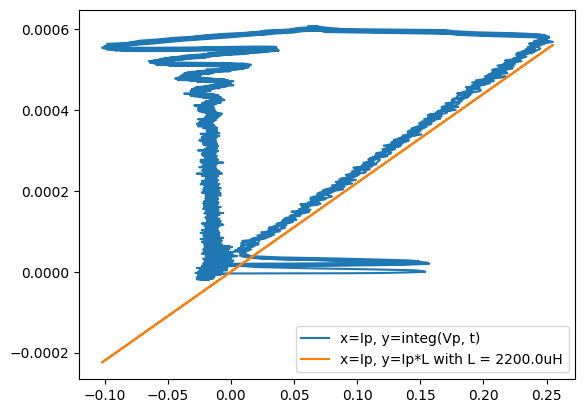

In [34]:
plt.plot(Ip, integVp,label =  "x=Ip, y=integ(Vp, t)")
L = 2200e-6
# v = L di/dt
# L i = integ(v,t)
plt.plot(Ip, Ip*L,label =  f"x=Ip, y=Ip*L with L = {1e6*L}uH")
plt.legend()

# spread spectrum

In [9]:


#df= pd.read_csv("2025-12-21_14-06-28-894.csv")
df= pd.read_csv("2025-12-21_14-08-00-216.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values
Vs = df.CH4.values
time = np.arange(0, len(Vp)*Ts, Ts)





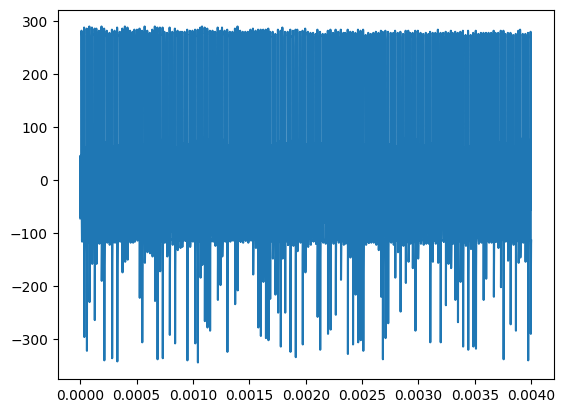

In [10]:
plt.plot(time, Vp)

(0.0, 0.001)

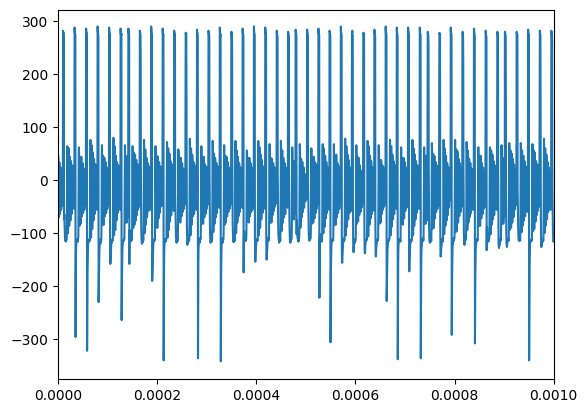

In [11]:
plt.plot(time, Vp)
plt.xlim([0,1e-3])

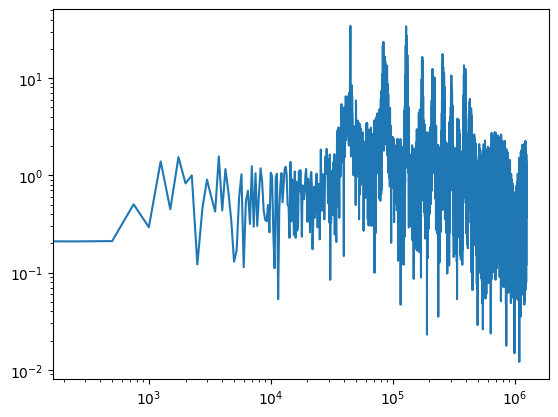

In [12]:
X = np.fft.fft(Vp)
f = np.fft.fftfreq(len(Vp), Ts)

mask = f >= 0
f = f[mask]
X_mag = 2.0 * np.abs(X[mask]) / len(Vp)
plt.plot(f, X_mag)
plt.xscale("log")
plt.yscale("log")

(10000.0, 100000.0)

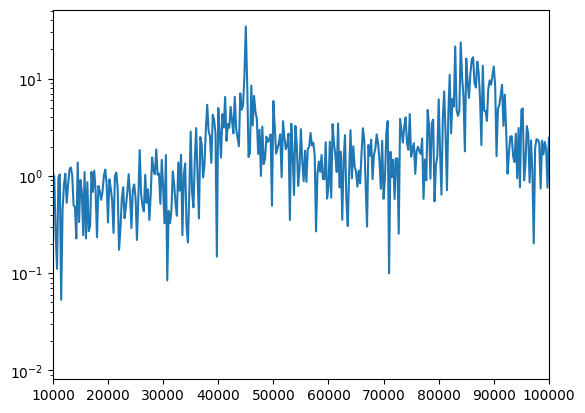

In [13]:
plt.plot(f, X_mag)
#plt.xscale("log")
plt.yscale("log")
plt.xlim([10e3,100e3])